In [2]:
import cirq
import sympy
import numpy as np
import scipy

# visualization tools
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import IPython

sns.set()
InteractiveShell = IPython.core.interactiveshell.InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
def make_qft(qubits):
    """Generator for the QFT on a list of qubits."""
    qreg = list(qubits)
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

'Visually check the QFT circuit.'

'eigenvalues'

array([ 1.        -1.79641798e-16j, -1.        +4.08639198e-17j,
        0.58518536-8.10899559e-01j, -0.88791115-4.60014981e-01j,
       -0.75854991-6.51614942e-01j, -0.49694177-8.67783890e-01j,
       -0.62780251-7.78372669e-01j,  0.89539314-4.45276460e-01j,
        0.99841535-5.62742198e-02j,  0.99189388+1.27069001e-01j,
        0.70950701+7.04698374e-01j, -0.56956294+8.21947723e-01j,
       -0.33833743+9.41024856e-01j,  0.32331339+9.46291950e-01j,
        0.14148993+9.89939696e-01j, -0.08510603+9.96371901e-01j])

<AxesSubplot:xlabel='r', ylabel='i'>

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


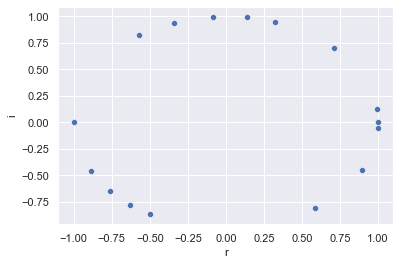

In [18]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
qft_u = qft.unitary()
'eigenvalues'
ev = scipy.linalg.eigvals(qft_u)
ev

sns.scatterplot(data={'r':np.real(ev), 'i':np.imag(ev)},x='r',y='i')
print(qft)

In [4]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)
            
"""Visually check the inverse QFT circuit."""
qubits = cirq.LineQubit.range(4)
iqft = cirq.Circuit(make_qft_inverse(qubits))
print(iqft)

'Visually check the inverse QFT circuit.'

                   ┌────────┐   ┌──────────────┐   ┌────────┐
0: ──────────────────────────────@──────────────────@───────────@────────H───
                                 │                  │           │
1: ─────────────────@────────────┼───────@──────────┼──────H────@^-0.5───────
                    │            │       │          │
2: ───────@─────────┼──────H─────┼───────@^-0.5─────@^-0.25──────────────────
          │         │            │
3: ───H───@^-0.5────@^-0.25──────@^(-1/8)────────────────────────────────────
                   └────────┘   └──────────────┘   └────────┘


In [1]:
import cirq

q0, q1 = cirq.LineQubit.range(2)
# q0 = cirq.GridQubit(0, 0)
# q1 = cirq.GridQubit(0, 1)

grover = cirq.Circuit()
grover.append([cirq.H(q0), cirq.H(q1)])

# Oracle for |00⟩ :
grover.append([cirq.X(q0), cirq.X(q1)])
grover.append(cirq.CX(q0,q1))
grover.append([cirq.X(q0), cirq.X(q1)])

grover.append([cirq.H(q0), cirq.H(q1)])

# reflection circuit :
grover.append([cirq.Z(q0), cirq.Z(q1)])
grover.append(cirq.CX(q0,q1))

grover.append([cirq.H(q0), cirq.H(q1)])
grover.append([cirq.measure(q0), cirq.measure(q1)])

print(grover)

simulator = cirq.Simulator()
result = simulator.simulate(grover)
# result = simulator.run(circuit, repetitions=40) # NISQ computers
print(result)

0: ───H───X───@───X───H───Z───@───H───M───
              │               │
1: ───H───X───X───X───H───Z───X───H───M───
measurements: 0=0 1=1
output vector: |01⟩
